# VCF parsing
## Introduction
fastDFE provides parser utilities that enable convenient parsing of frequency spectra from VCF files. By default, {class}`~fastdfe.parser.Parser` looks at the ``AA`` tag in the VCF file's info field to retrieve the correct polarization. Sites for which this tag is not well-defined are by default included (see {attr}`~fastdfe.parser.Parser.skip_not_polarized`). Note that non-polarized frequency spectra provide little information on the distribution of beneficial mutations, however.

We might also want to stratify the SFS by some site properties, such as synonymy. This is done by passing stratifications to the parser. In this example, we will stratify the SFS by synonymous and non-synonymous mutations using a VCF file for ``Betula spp.``

In [1]:
library(fastdfe)

# load the fastdfe package
fastdfe <- load_fastdfe()

In [2]:
Parser <- fastdfe$Parser

# instantiate parser
p <- Parser(
    n = 10,
    vcf = "../../../resources/genome/betula/all.vcf.gz",
    stratifications = c(fastdfe$DegeneracyStratification())
)

# parse SFS
spectra <- Parser$parse(p)

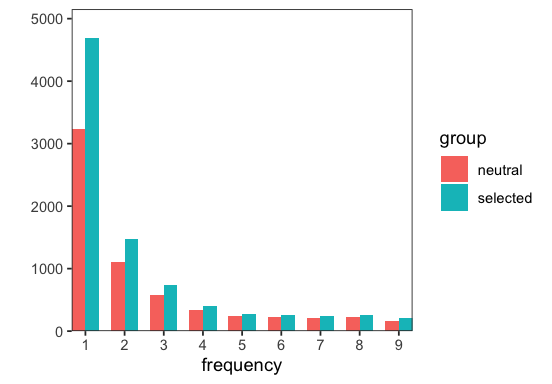

In [3]:
# visualize SFS
p <- fastdfe$Spectra$plot(spectra)

fastDFE relies here on VCF info tags to determine the degeneracy of a site but this behavior can be customized (cf. {class}`~fastdfe.parser.DegeneracyStratification`).

## Stratifications
We can use also several stratifications in tandem by specifying a list of stratifications. In this example, we will stratify the SFS by synonymy as well as base transitions type. The resulting spectra can be fed directly into fastDFE's inference routines. See {mod}`~fastdfe.parser` module for a complete list of available stratifications.

In [4]:
# instantiate parser
p <- Parser(
    n = 10,
    vcf = "../../../resources/genome/betula/all.vcf.gz",
    stratifications = c(fastdfe$DegeneracyStratification(), fastdfe$AncestralBaseStratification())
)

# parse SFS
spectra <- Parser$parse(p)

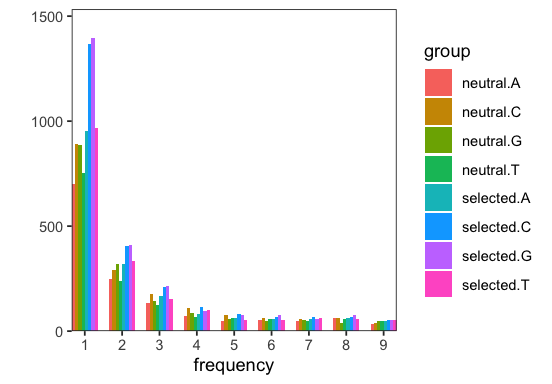

In [5]:
# visualize SFS
p <- fastdfe$Spectra$plot(spectra)

Note that fastDFE requires the ancestral state of sites to be determined. The {class}`~fastdfe.parser.Parser` achieves this by examining the `AA` field, although this behavior can be customized.

## Annotations
fastDFE provides numerous annotations accessible directly during the parsing process. To annotate a VCF file directly, consider using the {class}`~fastdfe.annotation.Annotator` class.

### Degeneracy and Synonymy Annotations
The supported annotations are {class}`~fastdfe.annotation.DegeneracyAnnotation` and {class}`~fastdfe.annotation.SynonymyAnnotation`, which can be used together with {class}`~fastdfe.parser.DegeneracyStratification` and {class}`~fastdfe.parser.SynonymyStratification`, respectively. These annotations are useful for stratifying the SFS by synonymous and non-synonymous mutations. Note that the {class}`~fastdfe.annotation.DegeneracyAnnotation` also infers the number of mutational target sites, which is essential for accurate DFE inference. However, not all VCF files contain monomorphic sites. Using {class}`~fastdfe.annotation.SynonymyAnnotation` with {class}`~fastdfe.parser.Parser`, the number of mutational target sites can be inferred from the total length of the coding sequences specified in the accompanying GFF file. Alternatively, the number of mutational target sites can be specified manually using the ``n_target_sites`` argument of {class}`~fastdfe.parser.Parser`. {class}`~fastdfe.parser.SynonymyStratification` was tested against [VEP](https://www.ensembl.org/info/docs/tools/vep/index.html) and [SnpEff](https://pcingola.github.io/SnpEff/) and provides the same annotations in almost all cases.

### Ancestral Allele Annotation
Currently, we only support maximum parsimony ancestral allele inference (see {class}`~fastdfe.annotation.MaximumParsimonyAncestralAnnotation`), which is straightforward but susceptible to errors. Some errors can be avoided by incorporating {class}`~fastdfe.filtration.DeviantOutgroupFiltration`. Alternatively, if inference on folded spectra is not an option, we provide a snakemake [wrapper for EST-SFS](https://github.com/Sendrowski/fastDFE/blob/master/snakemake/rules/est-sfs.smk) that employs a more sophisticated method for ancestral allele inference. You can also see [here](https://github.com/Sendrowski/fastDFE/blob/master/snakemake/rules/est-sfs_example.smk) for an example of how to use this wrapper.

## Filtrations
fastDFE also offers a number of filtrations which can be accessed immediately while parsing. Alternatively, to filter a VCF file directly, use the {class}`~fastdfe.filtration.Filterer` class. Some useful filtrations include {class}`~fastdfe.filtration.DeviantOutgroupFiltration`, {class}`~fastdfe.filtration.CodingSequenceFiltration`, and {class}`~fastdfe.filtration.BiasedGCConversionFiltration`. For a complete list of available filtrations, refer to the API reference.

Note that all components can easily be customized by creating another implementation of the corresponding base class.